$\newcommand{\n}[1]{\|#1 \|}$
$\renewcommand{\a}{\alpha}$
$\renewcommand{\b}{\beta}$
$\renewcommand{\c}{\gamma}$
$\renewcommand{\d}{\delta}$
$\newcommand{\la}{\lambda}$
$\newcommand{\e}{\varepsilon}$
$\renewcommand{\t}{\tau}$
$\renewcommand{\th}{\theta}$
$\newcommand{\s}{\sigma}$
$\newcommand{\x}{\bar x}$
$\newcommand{\n}[1]{\left\|#1 \right\|}$ 
$\newcommand{\R}{\mathbb R}            $ 
$\newcommand{\N}{\mathbb N}            $ 
$\newcommand{\Z}{\mathbb Z}            $ 
$\newcommand{\lr}[1]{\left\langle #1\right\rangle}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\sign}{sign}$

## **Binary classification** 
**Problem**: Given data $(a_1, b_1), \dots, (a_n,b_n)$ with $a_i\in \R^d$ and $b_i = \pm 1$. We know that data is linearly separated, learn a "simple" rule to classify them.

### **Perceptron algorithm**
----------------------
1. Intialize $x_1 = (0,\dots, 0)$
2. `for` $t = 1,\dots, T$:

$\qquad \qquad$ obtain $a_t$

$\qquad \qquad$ `if` $b_t \lr{a_t, x_t} \leq 1$:

$\qquad \qquad$ $\qquad \qquad$ $x_{t+1} = x_t + b_t a_t$

$\qquad \qquad$ `else` 

$\qquad \qquad$ $\qquad \qquad$ $x_{t+1} = x_t$

-------------------------



There is no one $f$ that we want to minimize, instead every round we obtain a new $f_t$.

Consider $$f_t(x) =  \max(0, 1- b_t\lr{a_t,x}). $$
Its subgradient is 
$$g_t(x) = \begin{cases}
- b_t a_t \quad &\text{if } b_t\lr{a_t,x} \leq 1\\
0, \quad &\text{else}
\end{cases} $$
This function is known as *hinge loss*. Why this function and not the other? The "best" function to classify points would be $\ell(x, a_t, b_t) = 1_{[b_t \lr{a_t,x}\leq 0]}$. However, it is discontinuous, so we use $f_t$ as its surrogate (continuous and convex!). Note that $f_t(x) \geq \ell(x, a_t, b_t)$.

Hence, we may consider update
$$x_{t+1} = x_t - g_t$$


**Conclusion**: Perceptron = Online subgradient method (gradient descent)

In [4]:
using LinearAlgebra
using Plots
using Distributions: MvNormal
using Random 
#using StatsBase

#### Prepare data

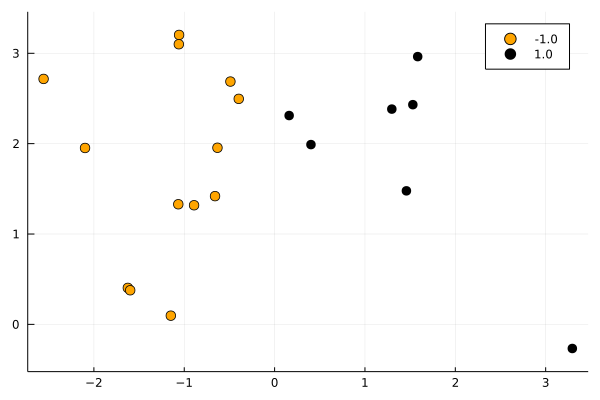

In [5]:
n_samples = 20
k = 7

A = zeros(2, n_samples)
b = zeros(n_samples)
Random.seed!(1);
A[:, 1:k] = rand(MvNormal([1.0, 2.0], 1.0), k);

b[1:k] .= 1
A[:, (k+1):end] = rand(MvNormal([-1.0, 2.0], 0.9), n_samples - k);

b[(k+1):end] .= -1;
p = scatter((A[1,:], A[2, :]),
                   group = b,
                   color_palette=[:orange,:black],
                   markercolor=:match,
                   markersize = 5.5,
                   aspect_ratio=:equal
)

In [9]:
A = vcat(A, ones(n_samples)') #lift data into one more dimension

3×20 Matrix{Float64}:
 1.29729  0.402366  0.160973   3.29509   …  -0.489074  -0.659261  -1.59818
 2.3824   1.98955   2.31111   -0.267086      2.68715    1.41896    0.377276
 1.0      1.0       1.0        1.0           1.0        1.0        1.0

1. What if data cannot be separated by a line that goes through 0?
2. What if data is not linearly separated?

In [6]:
function perceptron(A, b, iter=10)
    x = zeros(size(A)[1])
    n_samples = size(A)[2]
    rounds = rand(1:n_samples, n_samples*iter)
    for t in rounds
        a = A[:, t]
        prediction = sign(dot(a, x))
        if prediction != b[t]
            x = x + b[t] * a
        end
    end
    return x
end
;

In [7]:
x1 = perceptron(A, b, 5);

Plot the results

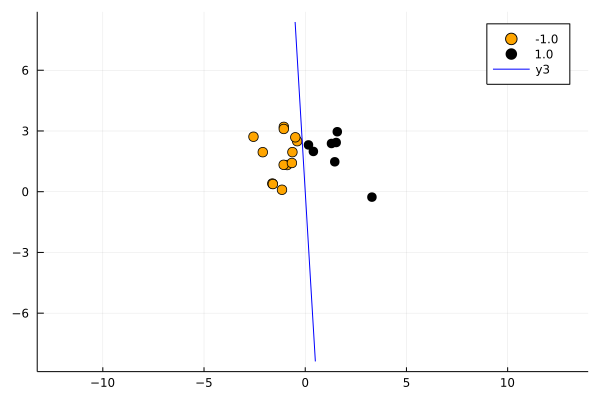

In [8]:
p = scatter((A[1,:], A[2, :]),
                   group = b,
                   color_palette=[:orange,:black],
                   markercolor=:match,
                   markersize = 5.5,
                   aspect_ratio=:equal
)
line_x = collect(-0.5:0.01:0.5);
line_y = - x1[1]/x1[2] * line_x
plot!(p, (line_x, line_y), color=:blue)
p

### **Special cases of SGD**

Given $A\in \R^{m\times n}, b\in \R^m$, solve $Ax = b$. Let $a_i$ be the $i$-th row of $A$.

**Kaczmarz’s method**:
$$x_{k+1} = P_{\text{row } i}x_k = x_k - \frac{\lr{a_i,x_k}-b_i}{\n{a_i}^2}a_i,$$
where $i = k \mod (m + 1)$

**Randomized Kaczmarz’s method**:
\begin{align}
& \text{Sample } i\in \{1,\dots, m\} \text{ with probabilities } \frac{\n{a_{i}}^2}{\n{A}_F^2}\\
& x_{k+1} = P_{\text{row } i}x_k = x_k - \frac{\lr{a_i,x_k}-b_i}{\n{a_i}^2}a_i,
\end{align}


We can also consider weighted least squares problem: $f(x) = \frac{1}{2m}\sum_{i=1}^m \frac{1}{\n{a_i}^2}|\lr{a_{i},x}-b_i|^2$. The stochastic gradient of this objective is 
$\nabla f_i(x) = \frac{\lr{a_i,x_k}-b_i}{\n{a_i}^2}a_i$. Hence, Randomized Kaczmarz’s method is equivalent to SGD with a special sampling rule.


**Task**: Implement GD, Kaczmarz method, and randomized Kaczmarz method for a random linear system.

**Question**: Why doesn't SGD use a small stepsize?

In [ ]:
m, n = 100, 50
A = randn(m,n)
x_sol = randn(n)
b = A * x_sol;

In [263]:
function Kaczmarz(A, b, x0, iter=100)
    ###
    m, n = size(A)
    objective_values = Float64[]

    for i in 1:(iter*m)
    ###
    end
    return objective_values, x
end

function RandKaczmarz(A, b, x0, iter=100)
    m, n = size(A)
    row_norms = [norm(A[i,:]) for i in 1:m]
    sampled_index_array = sample(1:m, Weights(weights), iter)
    objective_values = Float64[]

    ###
    ###
    return objective_values
end

function GD(A, b, x0, iter=100)
    x = x0
    objective_values = Float64[]
    for i in iter
        ###
    end
    return objective_values, x
end
;